# Analisis exploratorio de datos 

### Librerías

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Descarga de datos

In [121]:
directory = '../limpieza'

df = pd.read_csv(os.path.join(directory,"SIAP.csv"))

df.head()

,Año,Mes,Cultivo,Estado,Distrito,Municipio,Superficie(ha)_Sembrada,Superficie(ha)_Cosechada,Superficie(ha)_Siniestrada,Producción,Rendimiento(udm/ha)
0,2020,1,Tomate rojo,Aguascalientes,Aguascalientes,Calvillo,16.0,6.0,0.0,90.00,15.00
1,2020,1,Tomate rojo,Baja California,Ensenada,Ensenada,19.5,0.0,0.0,0.00,0.00
2,2020,1,Tomate rojo,Baja California Sur,Mulegé,Mulegé,80.0,0.0,0.0,0.00,0.00
3,2020,1,Tomate rojo,Baja California Sur,Comondú,Comondú,127.0,0.0,0.0,0.00,0.00
4,2020,1,Tomate rojo,Baja California Sur,La Paz,La Paz,611.0,106.0,0.0,4429.76,41.79


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355334 entries, 0 to 355333
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Año                         355334 non-null  int64  
 1   Mes                         355334 non-null  int64  
 2   Cultivo                     355334 non-null  object 
 3   Estado                      355334 non-null  object 
 4   Distrito                    355334 non-null  object 
 5   Municipio                   355334 non-null  object 
 6   Superficie(ha)_Sembrada     355334 non-null  float64
 7   Superficie(ha)_Cosechada    355334 non-null  float64
 8   Superficie(ha)_Siniestrada  355334 non-null  float64
 9   Producción                  355334 non-null  float64
 10  Rendimiento(udm/ha)         355334 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 29.8+ MB


Los datos obtenidos de la pagina del SIAP estan presentados de forma acumulativa, esto es, cada mes tiene la produccion, cosecha, etc. hecha ese mes mas la de los anteriores. Sin embargo, los meses de Octubre, Noviembre y Diciembre no presentan esta tendencia. El porque de esta situacion es el cambio de ano agricola, el cual inicia en octubre y termina en marzo. Ademas, en estos meses, para algunos cultivos, se presentan dos tablas, cada una en un ano agricola diferentes, esto tambien pasa en los primeros meses de ano para algunos cultivos. La forma de decidir cual tabla elegir no esta clara, se penso en 3 formas diferentes de solucionar este problema, la primera; tomar la primera tabla, la segunda; tomar la segunda tabla y la tercera; suma las dos tablas. Al final optamos por la primera opcion, ya que en las siguientes lineas de codigo haremos que cada mes tenga los resultados de solo ese mes, quitando el caracter acumulativo, y a nuestra interpretacion a partir de Octubre simplemente deja de acumular y vuelve a empezar, como se ve en la siguiente grafica con el Tomate rojo

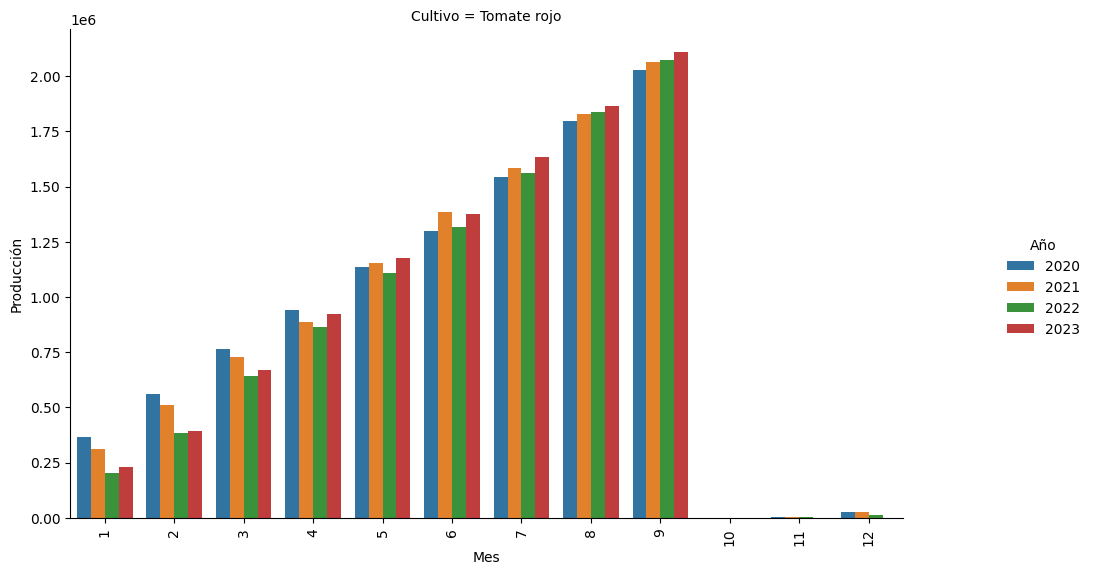

In [123]:
# Create a categorical plot with facets for different years
g = sns.catplot(x='Mes', y='Producción', data=df[df['Cultivo'] == 'Tomate rojo'], estimator=sum,
                hue='Año', kind='bar', row='Cultivo', errorbar=None)
g.set_xticklabels(rotation=90)  # Rotate x-axis labels by 90 degrees  ó á í ñ

# Adjust the figure size (optional)
g.fig.set_size_inches(12, 6)

# Show the plot
plt.show()

Explorando los datos, los cultivos que presentan este comportamiento son *Tomate rojo*, *Pepino*, *Brócoli*, *Cebolla*, *Sandía*, *Calabacita*, *Lechuga*, *Fresa*, *Berenjena*, *Papa* y *Melón*. Los demas presentan la tendencia acumulativa, como en la siguiente grafica del *Mango*.

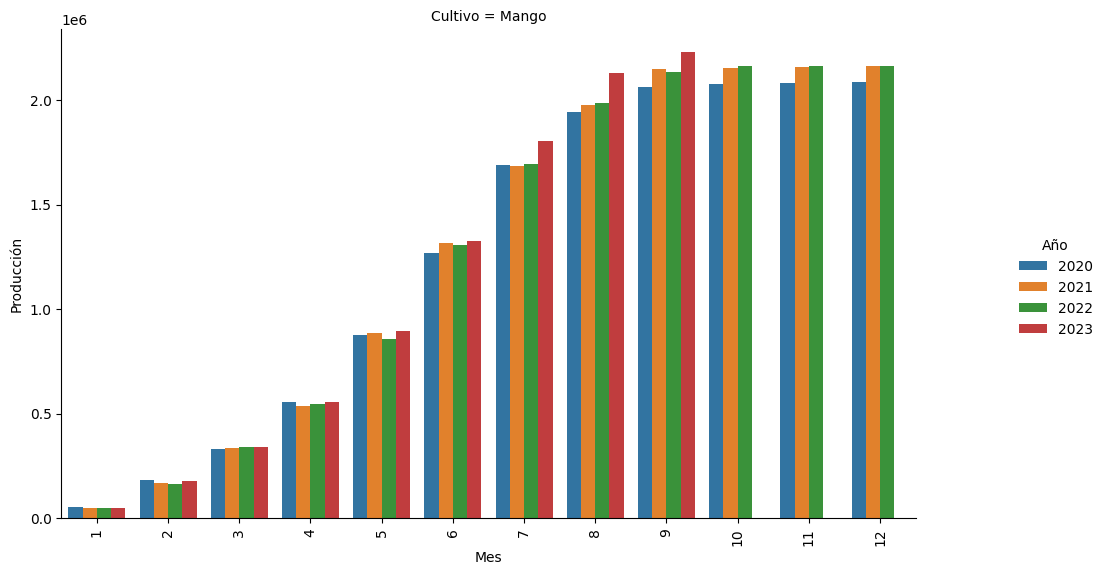

In [124]:
# Create a categorical plot with facets for different years
g = sns.catplot(x='Mes', y='Producción', data=df[df['Cultivo'] == 'Mango'], estimator=sum,
                hue='Año', kind='bar', row='Cultivo', errorbar=None)
g.set_xticklabels(rotation=90)  # Rotate x-axis labels by 90 degrees  ó á í ñ

# Adjust the figure size (optional)
g.fig.set_size_inches(12, 6)

# Show the plot
plt.show()

Ahora quitaremos el comportamiento acomulativo para tener solo los resultados de solo el mes, la forma de hacerlo cambiara dependiendo si existe el problema del anio agricola. 

In [125]:
df_dummy = df.copy()

In [126]:
group1 = ['Tomate rojo', 'Pepino', 'Brócoli', 'Cebolla', "Sandía", 'Calabacita', 'Lechuga', 'Fresa',
     'Berenjena', 'Papa', 'Melón']
group2 = ['Limón', 'Plátano', 'Mango', 'Papaya', 'Nopal', 'Nuez', 'Toronja', 'Piña', 'Uva', 
          'Naranja', 'Manzana', 'Pera', 'Durazno']

columns_to_update = ['Superficie(ha)_Sembrada', 'Superficie(ha)_Cosechada',
					'Superficie(ha)_Siniestrada', 'Producción']

In [110]:
for year in list(df['Año'].unique()):
    
    for crop in group2:

        for state in list(df['Estado'].unique()):
            
            for month in range(12,1,-1):

                try:
                    actual_month = (df['Año'] == year) & (df['Cultivo'] == crop) & \
                                   (df['Estado'] == state) & (df['Mes'] == month)
                    previous_month = (df['Año'] == year) & (df['Cultivo'] == crop) & \
                                     (df['Estado'] == state) & (df['Mes'] == month-1)

                    df_dummy.loc[actual_month, columns_to_update] -= \
                        df_dummy.loc[previous_month, columns_to_update].values[0]

                    df_dummy.loc[actual_month, 'Rendimiento(udm/ha)'] = \
                        df_dummy.loc[actual_month, 'Producción'] / \
                        df_dummy.loc[actual_month, 'Superficie(ha)_Cosechada']

                except Exception as e:
                    continue

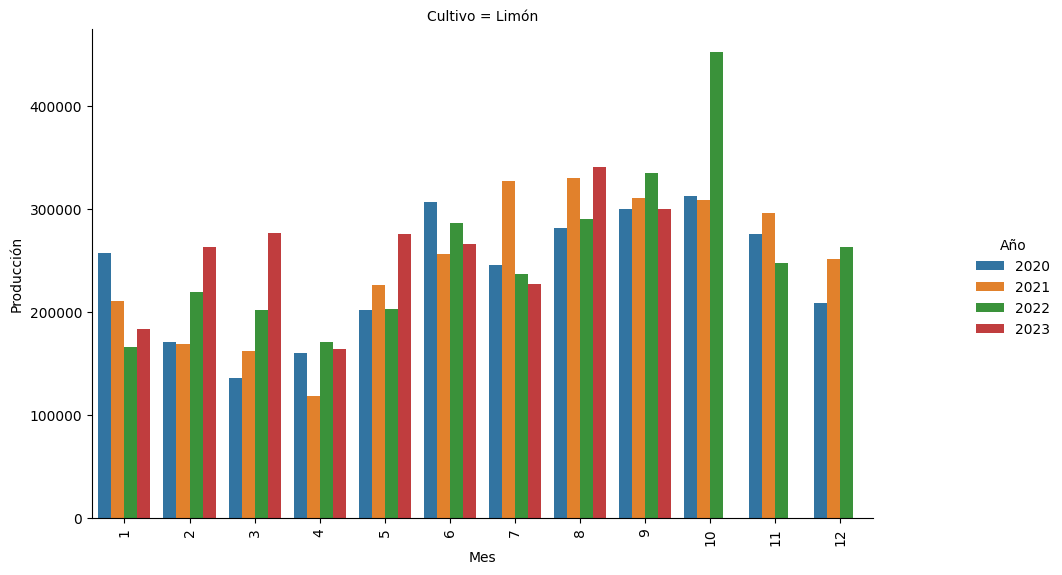

In [111]:
# Create a categorical plot with facets for different years
g = sns.catplot(x='Mes', y='Producción', data=df_dummy[df_dummy['Cultivo'] == 'Limón'], estimator=sum,
                hue='Año', kind='bar', row='Cultivo', errorbar=None)
g.set_xticklabels(rotation=90)  # Rotate x-axis labels by 90 degrees  ó á í ñ

# Adjust the figure size (optional)
g.fig.set_size_inches(12, 6)

# Show the plot
plt.show()

In [120]:
df[(df['Producción'] == 0) & (df['Rendimiento(udm/ha)'] == 0)].head()

,Año,Mes,Cultivo,Estado,Superficie(ha)_Sembrada,Superficie(ha)_Cosechada,Superficie(ha)_Siniestrada,Producción,Rendimiento(udm/ha)
1,2020,1,Tomate rojo,Baja California,19.5,0.0,0.0,0.0,0.0
3,2020,1,Tomate rojo,Campeche,210.0,0.0,0.0,0.0,0.0
4,2020,1,Tomate rojo,Colima,178.5,0.0,0.0,0.0,0.0
8,2020,1,Tomate rojo,Jalisco,257.0,0.0,0.0,0.0,0.0
9,2020,1,Tomate rojo,Estado de México,86.0,0.0,0.0,0.0,0.0


In [129]:
df[(df['Año'] == 2020) & (df['Cultivo'] == 'Tomate rojo') 
    & (df['Estado'] == 'Sonora') & (df['Mes'] == 10) ].head(12)

,Año,Mes,Cultivo,Estado,Distrito,Municipio,Superficie(ha)_Sembrada,Superficie(ha)_Cosechada,Superficie(ha)_Siniestrada,Producción,Rendimiento(udm/ha)
71565,2020,10,Tomate rojo,Sonora,Guaymas,Empalme,55.0,0.0,0.0,0.0,0.0
71566,2020,10,Tomate rojo,Sonora,Guaymas,Guaymas,135.0,0.0,0.0,0.0,0.0
71567,2020,10,Tomate rojo,Sonora,Cajeme,Cajeme,134.0,0.0,0.0,0.0,0.0
71568,2020,10,Tomate rojo,Sonora,Cajeme,Etchojoa,20.0,0.0,0.0,0.0,0.0
71569,2020,10,Tomate rojo,Sonora,Cajeme,Benito Juárez,60.0,0.0,0.0,0.0,0.0
71570,2020,10,Tomate rojo,Sonora,Cajeme,San Ignacio Río Muerto,40.0,0.0,0.0,0.0,0.0


In [113]:
df_dummy[(df_dummy['Año'] == 2020) & (df_dummy['Cultivo'] == 'Naranja') & (df_dummy['Estado'] == 'Sonora')].tail(12)

,Año,Mes,Cultivo,Estado,Superficie(ha)_Sembrada,Superficie(ha)_Cosechada,Superficie(ha)_Siniestrada,Producción,Rendimiento(udm/ha)
344,2020,1,Naranja,Sonora,6738.5,3153.00,0.0,21022.3,6.670000
786,2020,2,Naranja,Sonora,0.0,550.00,0.0,31565.7,57.392182
1237,2020,3,Naranja,Sonora,0.0,497.00,0.0,26060.5,52.435614
1709,2020,4,Naranja,Sonora,0.0,295.00,0.0,22264.3,75.472203
2195,2020,5,Naranja,Sonora,0.0,845.26,0.0,25302.0,29.933985
2684,2020,6,Naranja,Sonora,0.0,185.74,0.0,17692.5,95.254119
3173,2020,7,Naranja,Sonora,0.0,0.00,0.0,7239.7,inf
3665,2020,8,Naranja,Sonora,0.0,177.00,0.0,1272.0,7.186441
4159,2020,9,Naranja,Sonora,0.0,100.00,0.0,2100.0,21.000000
4546,2020,10,Naranja,Sonora,0.0,40.00,0.0,740.0,18.500000


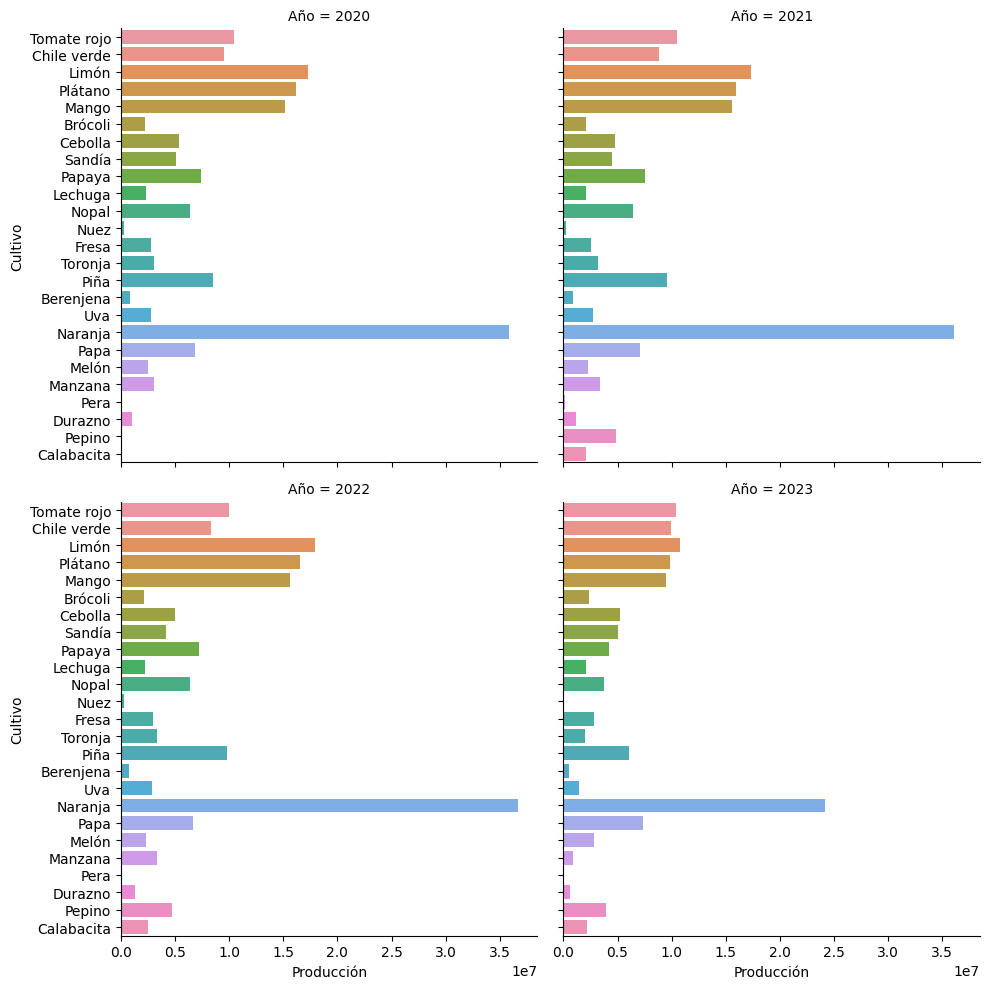

In [15]:
# Create a categorical plot with facets for different years
g = sns.catplot(x='Producción', y='Cultivo', data=df, estimator=sum,
                col='Año', kind='bar', col_wrap=2, errorbar=None)

# Adjust the figure size (optional)
g.fig.set_size_inches(10, 10)

# Show the plot
plt.show()

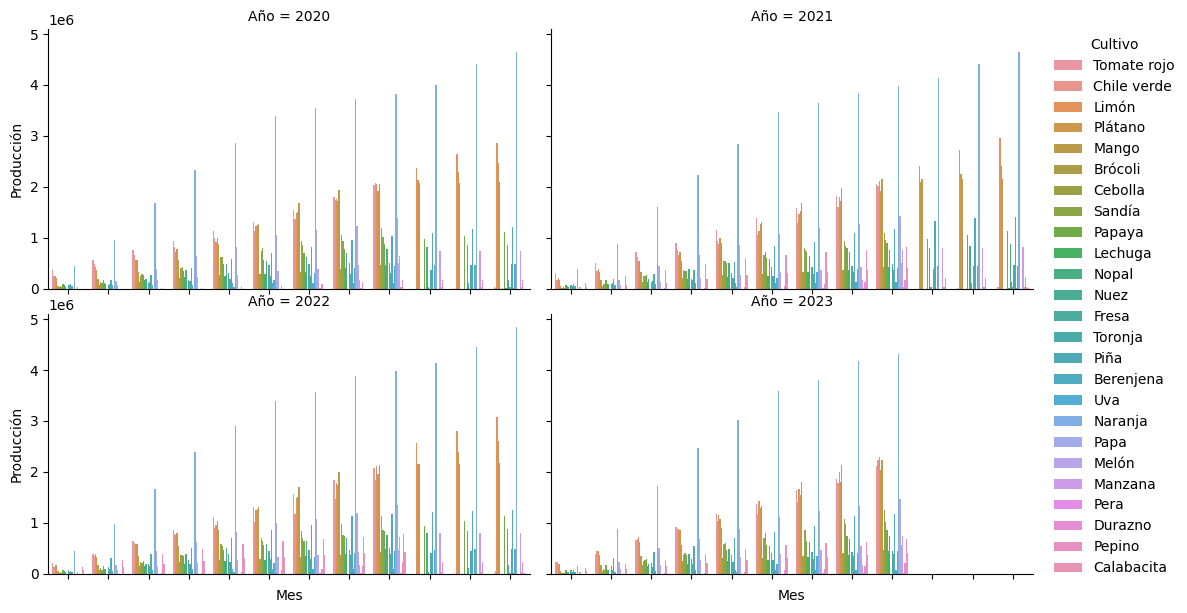

In [16]:
# Create a categorical plot with facets for different years
g = sns.catplot(x='Mes', y='Producción', data=df, estimator=sum,
                col='Año', kind='bar', hue='Cultivo', col_wrap=2, errorbar=None)
g.set_xticklabels(rotation=90)  # Rotate x-axis labels by 90 degrees

# Adjust the figure size (optional)
g.fig.set_size_inches(12, 6)

# Show the plot
plt.show()

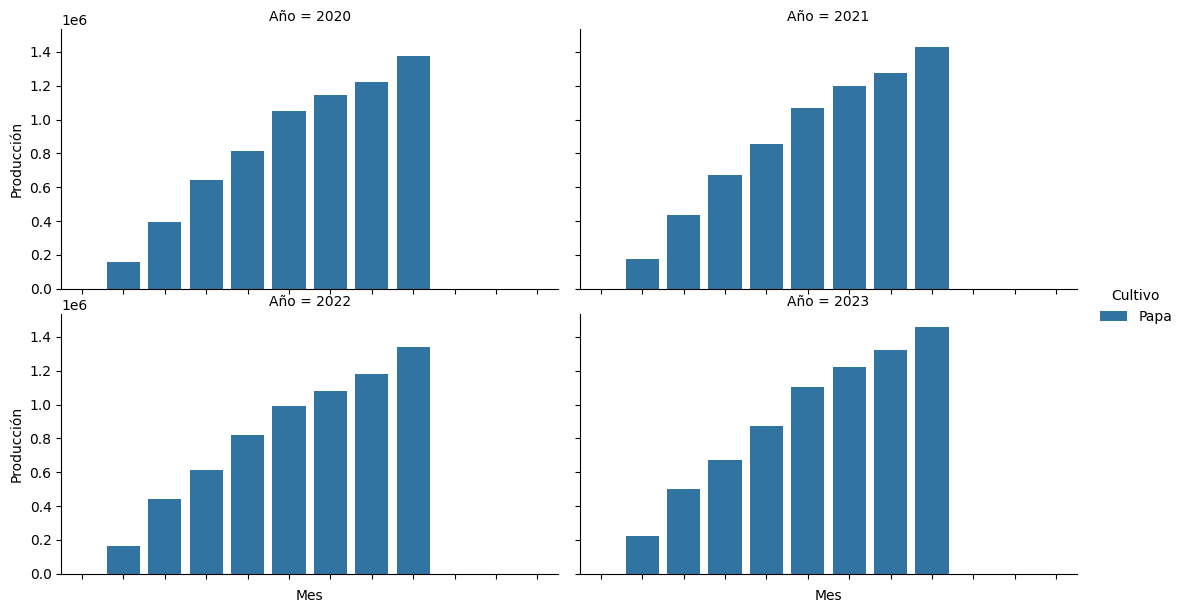

In [17]:
# Create a categorical plot with facets for different years
g = sns.catplot(x='Mes', y='Producción', data=df[df['Cultivo'] == 'Papa'], estimator=sum,
                col='Año', kind='bar', hue='Cultivo', col_wrap=2, errorbar=None)
g.set_xticklabels(rotation=90)  # Rotate x-axis labels by 90 degrees  ó á í ñ

# Adjust the figure size (optional)
g.fig.set_size_inches(12, 6)

# Show the plot
plt.show()